In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sqlite3

banco = sqlite3.connect('drive/My Drive/DataSets/database.sqlite')

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as path_effects
import pandas as pd
import seaborn as sns


plt.rcParams['figure.figsize'] = (11,5)
#plt.style.use('default')

# O código para geração de gráficos foi feito em forma de funções:
### Para uma melhor organização e reutilização do código a maior parte dos gráficos foram separados por células e funções. 

## Gráficos de box plot dos gols feitos

In [0]:
def gerar_bloxplot(linhas, tabela, condicao, titulo='NULL', gerar_graf=False):
  a = banco.execute("select %s from %s where %s"%(linhas, tabela, condicao))
  gols = []
  dados = a.fetchall()
  for linha in dados:
    gols.append(linha[0])

  if gerar_graf:
    npgols = np.array(gols)
    plt.text(0.7, 0.7, 'Média de gols: %.2f'%(np.mean(npgols)))
    plt.boxplot(gols, 0, 'rs',0)
    plt.title('%s'%titulo)
    plt.show()
  else:
    return gols

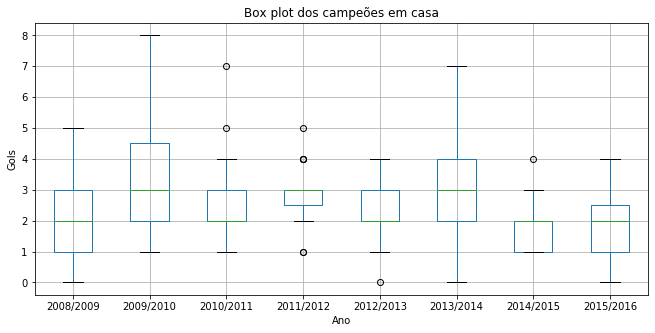

In [0]:
campeoes = ['10260', '8455', '10260', '8456', '10260', '8456', '8455', '8197']
campanhas_casa = {'2008/2009': [], '2009/2010': [], '2010/2011': [], '2011/2012': [], '2012/2013': [],
                  '2013/2014': [], '2014/2015': [], '2015/2016': []}
campanhas_fora = {'2008/2009': [], '2009/2010': [], '2010/2011': [], '2011/2012': [], '2012/2013': [],
                  '2013/2014': [], '2014/2015': [], '2015/2016': []}
j = 0
for i in campanhas_casa.keys():
  campanhas_casa[i] = gerar_bloxplot("home_team_goal", "match", "home_team_api_id = '%s' and season = '%s'"%(campeoes[j], i))
  campanhas_fora[i] = gerar_bloxplot("away_team_goal", "match", "away_team_api_id = '%s' and season = '%s'"%(campeoes[j], i))
  j += 1
data_casa = pd.DataFrame(campanhas_casa)
data_fora = pd.DataFrame(campanhas_fora)
data_casa.boxplot()
plt.title("Box plot dos campeões em casa")
plt.xlabel("Ano")
plt.ylabel('Gols')

plt.style.use('seaborn-paper')
plt.rcParams['figure.figsize'] = (10,6)
plt.savefig('drive/My Drive/DataSets/boxplotCasa.png')
plt.show()

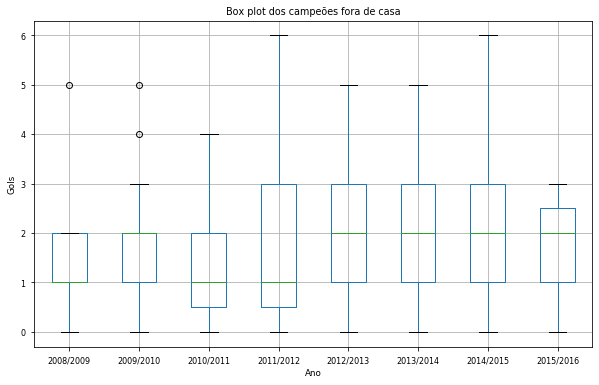

In [0]:
data_fora.boxplot()
plt.title("Box plot dos campeões fora de casa")
plt.xlabel("Ano")
plt.ylabel('Gols')
plt.rcParams['figure.figsize'] = (10,6)
plt.savefig('drive/My Drive/DataSets/boxplotFora.png')
plt.show()

# Histograma dos gols feitos por jogos

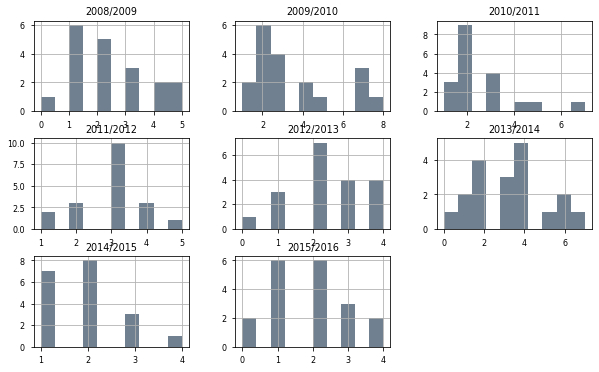

In [0]:
data_casa.hist(color='#708090')
plt.rcParams['figure.figsize'] = (10,9)
plt.savefig('drive/My Drive/DataSets/histCasa.png')
plt.show()

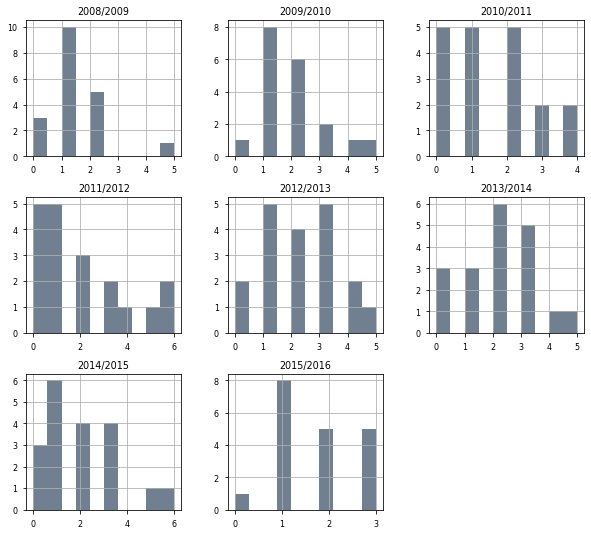

In [0]:
data_fora.hist(color='#708090')
plt.rcParams['figure.figsize'] = (10,9)
plt.xlabel('Gols feitos')
plt.ylabel('Jogos')
plt.savefig('drive/My Drive/DataSets/histFora.png')
plt.show()

# Gráfico de barras dos gols feitos

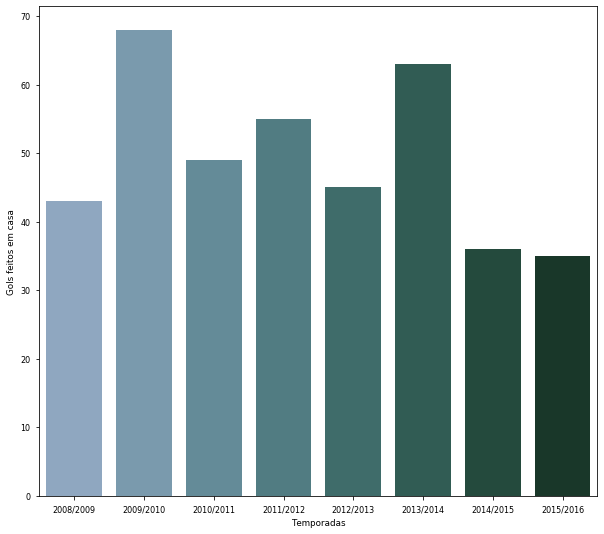

In [0]:
golsC_temp = []
temp = []
for i in campanhas_casa: 
  golsC_temp.append(sum(campanhas_casa[i]))
  temp.append(i)
#pallete = sns.color_palette("Blues", 10)
pallete = sns.cubehelix_palette(8, 2, 0.4, 0.90, 0.8, 0.6)

sns.barplot(temp, golsC_temp, palette=pallete)
plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Temporadas')
plt.ylabel('Gols feitos em casa')
plt.savefig('drive/My Drive/DataSets/golsFeitosCasa.png')
plt.show()

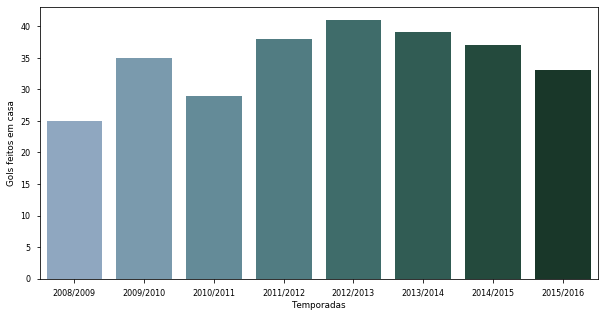

In [0]:
golsF_temp = []
temp = []
for i in campanhas_fora: 
  golsF_temp.append(sum(campanhas_fora[i]))
  temp.append(i)
#pallete = sns.color_palette("Blues", 10)
pallete = sns.cubehelix_palette(8, 2, 0.4, 0.90, 0.8, 0.6)

sns.barplot(temp, golsF_temp, palette=pallete)
plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Temporadas')
plt.ylabel('Gols feitos em casa')
plt.savefig('drive/My Drive/DataSets/golsFeitosFora.png')
plt.show()

# Trabalhando com médias

In [0]:
medias_casa  = {'    ': 'Média casa'}
medias_fora  = {'    ': 'Média fora'}
medias_total = {'    ': 'Média total'}
j = 0
for i in campanhas_casa:
  medias_casa[i] = data_casa[i].mean()
  medias_fora[i] = data_fora[i].mean()
  medias_total[i] = (golsC_temp[j] + golsF_temp[j])/(len(campanhas_casa[i])*2)
  j+=1
data_media = pd.DataFrame([medias_casa, medias_fora, medias_total])
data_media.head()

,,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
0,Média casa,2.263158,3.578947,2.578947,2.894737,2.368421,3.315789,1.894737,1.842105
1,Média fora,1.315789,1.842105,1.526316,2.000000,2.157895,2.052632,1.947368,1.736842
2,Média total,1.789474,2.710526,2.052632,2.447368,2.263158,2.684211,1.921053,1.789474


# Box Plot mostrados separadamente

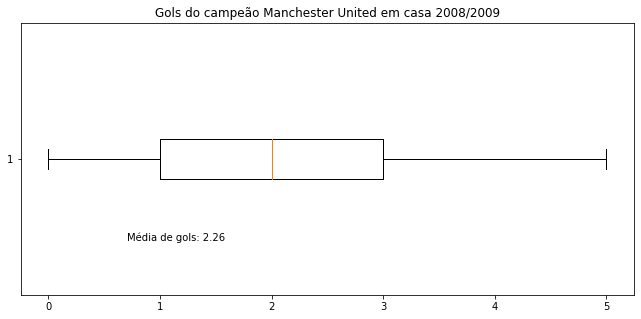

In [8]:
gerar_bloxplot("home_team_goal", "match", "home_team_api_id = '10260' and season = '2008/2009'",\
               "Gols do campeão Manchester United em casa 2008/2009", True)

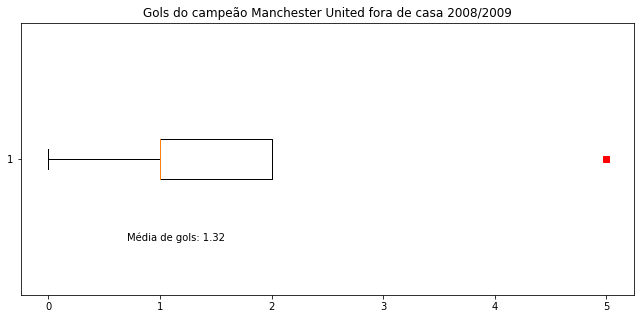

In [9]:
gerar_bloxplot("away_team_goal", "match", "away_team_api_id = '10260' and season = '2008/2009'",\
               "Gols do campeão Manchester United fora de casa 2008/2009", True)

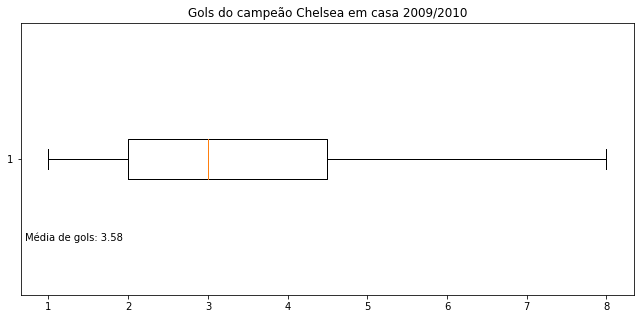

In [10]:
gerar_bloxplot("home_team_goal", "match", "home_team_api_id = '8455' and season = '2009/2010'",\
               "Gols do campeão Chelsea em casa 2009/2010", True)

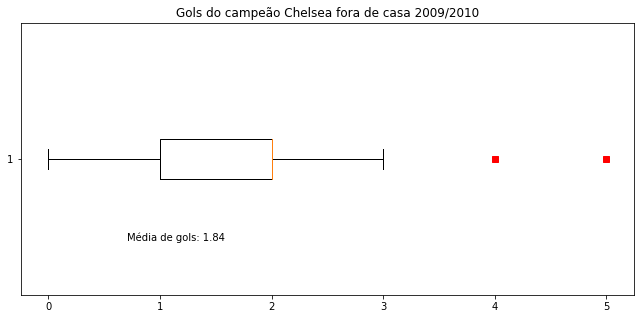

In [11]:
gerar_bloxplot("away_team_goal", "match", "away_team_api_id = '8455' and season = '2009/2010'",\
               "Gols do campeão Chelsea fora de casa 2009/2010", True)

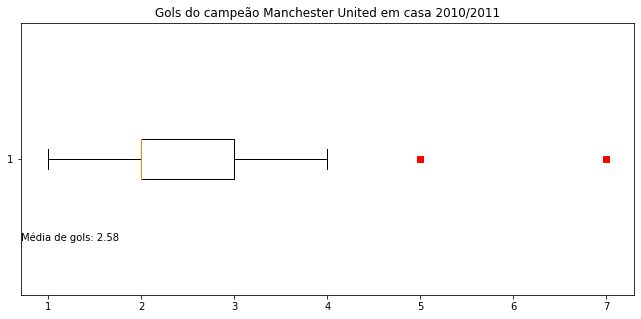

In [12]:
gerar_bloxplot("home_team_goal", "match", "home_team_api_id = '10260' and season = '2010/2011'",\
               "Gols do campeão Manchester United em casa 2010/2011", True)

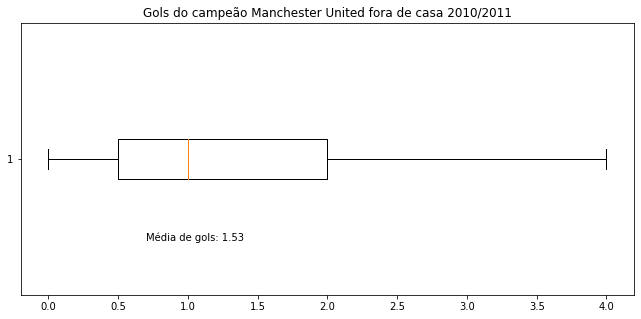

In [13]:
gerar_bloxplot("away_team_goal", "match", "away_team_api_id = '10260' and season = '2010/2011'",\
               "Gols do campeão Manchester United fora de casa 2010/2011", True)

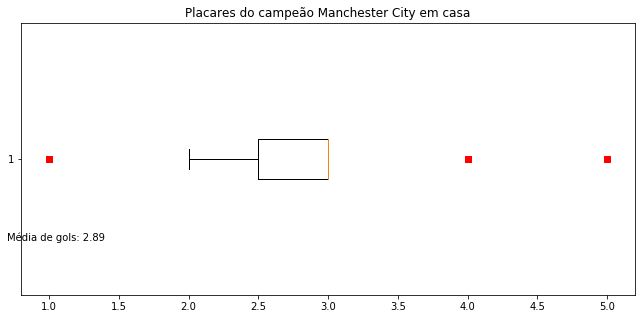

In [14]:
gerar_bloxplot("home_team_goal", "match", "home_team_api_id = '8456' and season = '2011/2012'", \
               "Placares do campeão Manchester City em casa", True)

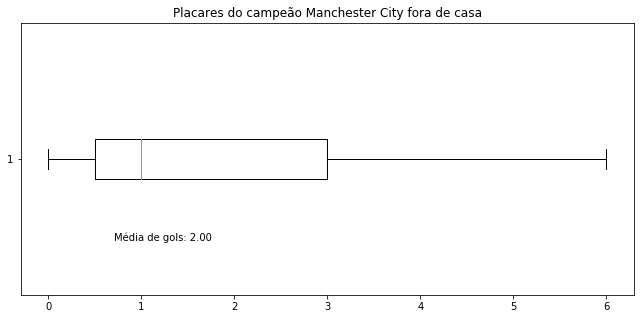

In [15]:
gerar_bloxplot("away_team_goal", "match", "away_team_api_id = '8456' and season = '2011/2012'", \
               "Placares do campeão Manchester City fora de casa", True)

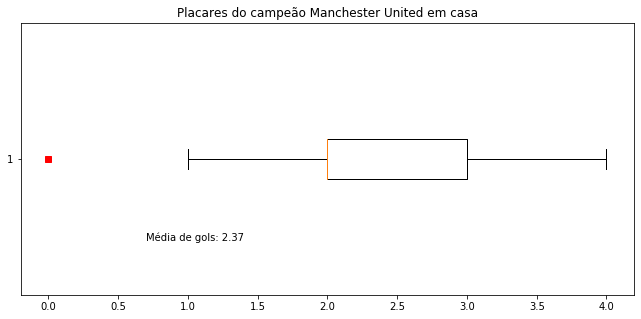

In [16]:
gerar_bloxplot("home_team_goal", "match", "home_team_api_id = '10260' and season = '2012/2013'", \
              "Placares do campeão Manchester United em casa", True)

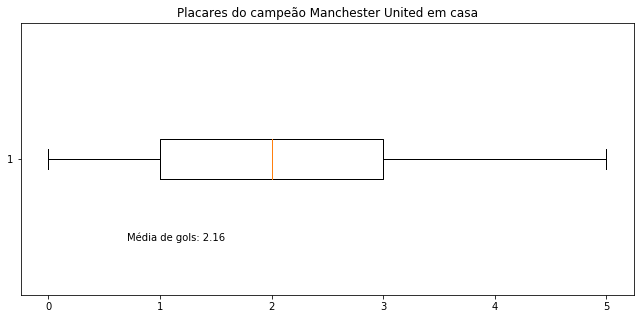

In [17]:
gerar_bloxplot("away_team_goal", "match", "away_team_api_id = '10260' and season = '2012/2013'", \
               "Placares do campeão Manchester United em casa", True)

# Os gráficos de barras com placares dos campeões

In [0]:
def numero_em_cima(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def gerar_grouped_bar(linhas1, tabela1, condicao1, linhas2, tabela2, condicao2, tibar1, tibar2, rep,titulo):
  a = banco.execute("select %s from %s where %s"%(linhas1, tabela2, condicao2))
  golsCa = []
  dados_a = a.fetchall()
  for linha in dados_a:
    golsCa.append(linha[0])

  b = banco.execute("select %s from %s where %s"%(linhas2, tabela2, condicao2))
  golsFo = []
  dados_b = b.fetchall()
  for linha in dados_b:
    golsFo.append(linha[0])

  jogo = ['J%d'%i for i in range(1, len(golsCa)+1)]

  x = np.arange(len(jogo))  
  width = 0.35  

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, golsCa, width, label='%s'%tibar1)
  rects2 = ax.bar(x + width/2, golsFo, width, label='%s'%tibar2)

  ax.set_ylabel('%s'%(rep))
  ax.set_title('%s'%(titulo))
  ax.set_xticks(x)
  ax.set_xticklabels(jogo)
  ax.legend()

  numero_em_cima(rects1, ax)
  numero_em_cima(rects2, ax)

  fig.tight_layout()

  plt.show()

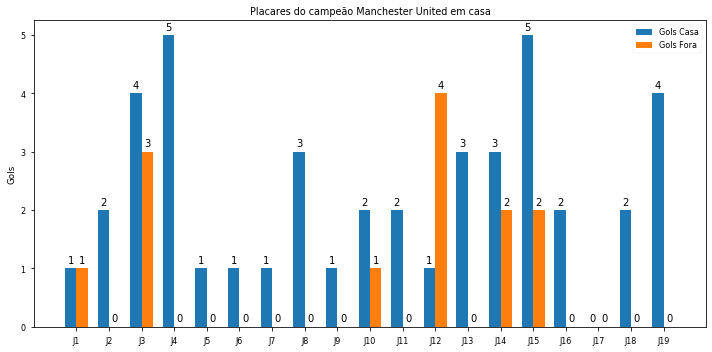

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '10260' and season = '2008/2009'", \
                  "away_team_goal", "match", "home_team_api_id = '10260' and season = '2008/2009'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester United em casa")

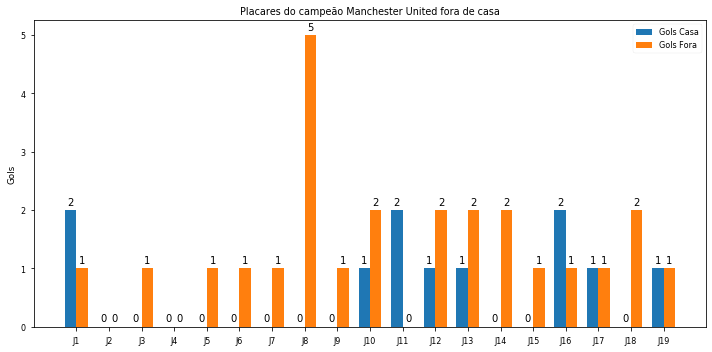

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '10260' and season = '2008/2009'", \
                  "away_team_goal", "match", "away_team_api_id = '10260' and season = '2008/2009'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester United fora de casa")

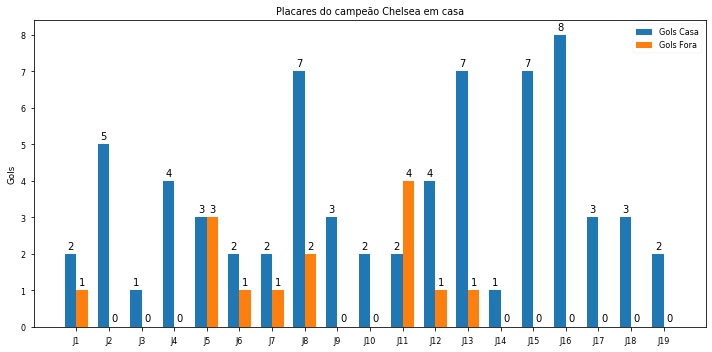

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '8455' and season = '2009/2010'", \
                  "away_team_goal", "match", "home_team_api_id = '8455' and season = '2009/2010'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Chelsea em casa")

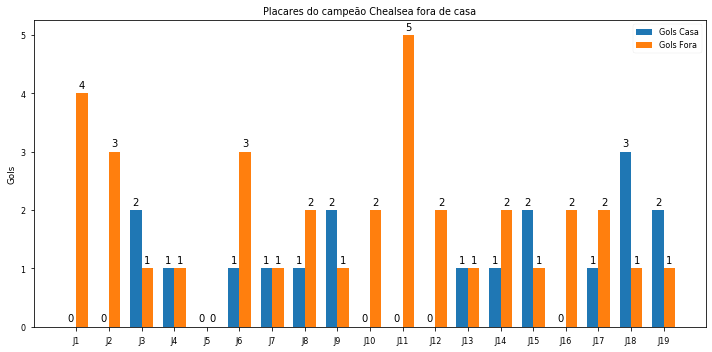

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '8455' and season = '2009/2010'", \
                  "away_team_goal", "match", "away_team_api_id = '8455' and season = '2009/2010'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Chealsea fora de casa")

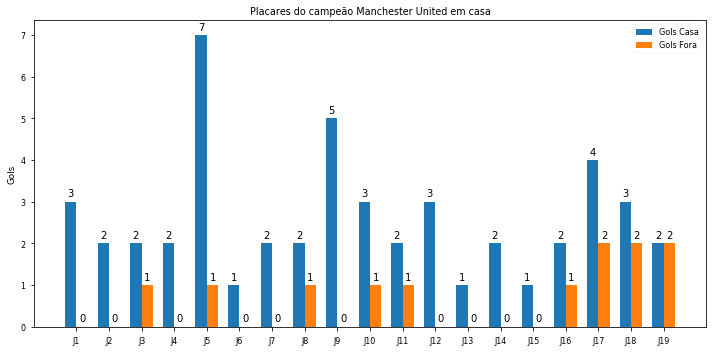

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '10260' and season = '2010/2011'", \
                  "away_team_goal", "match", "home_team_api_id = '10260' and season = '2010/2011'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester United em casa")

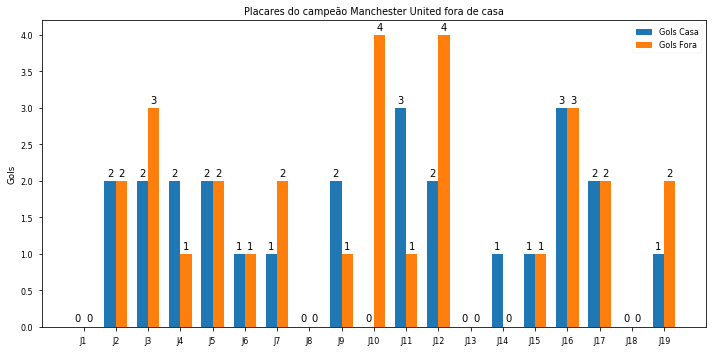

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '10260' and season = '2010/2011'", \
                  "away_team_goal", "match", "away_team_api_id = '10260' and season = '2010/2011'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester United fora de casa")

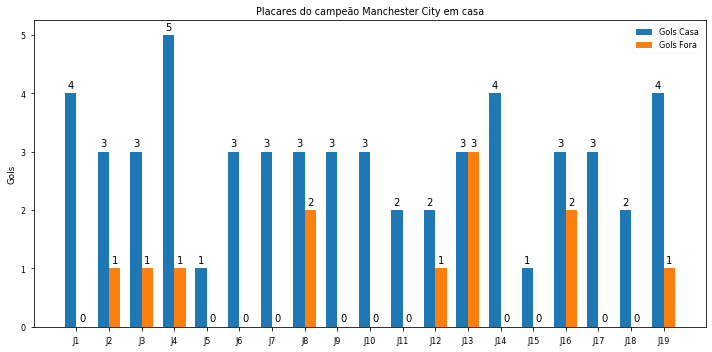

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '8456' and season = '2011/2012'", \
                  "away_team_goal", "match", "home_team_api_id = '8456' and season = '2011/2012'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester City em casa")

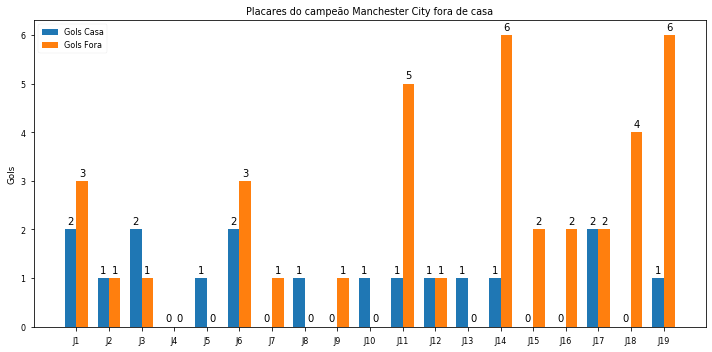

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '8456' and season = '2011/2012'", \
                  "away_team_goal", "match", "away_team_api_id = '8456' and season = '2011/2012'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester City fora de casa")

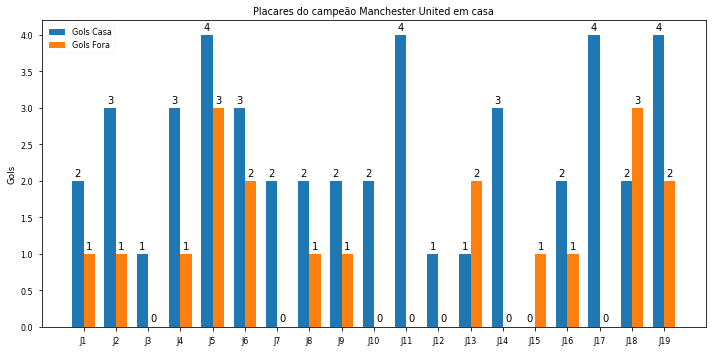

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '10260' and season = '2012/2013'", \
                  "away_team_goal", "match", "home_team_api_id = '10260' and season = '2012/2013'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester United em casa")

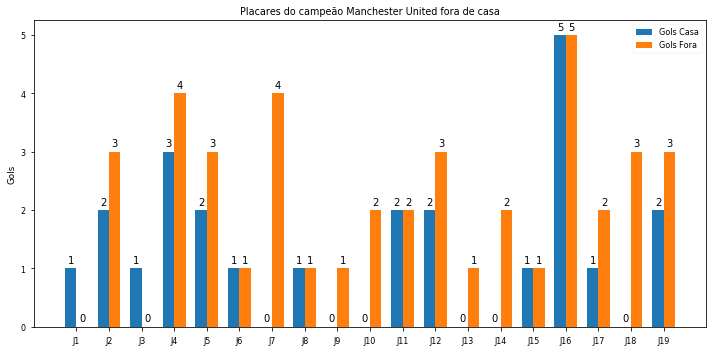

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '10260' and season = '2012/2013'", \
                  "away_team_goal", "match", "away_team_api_id = '10260' and season = '2012/2013'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester United fora de casa")

In [0]:
"""ERRO"""

'ERRO'

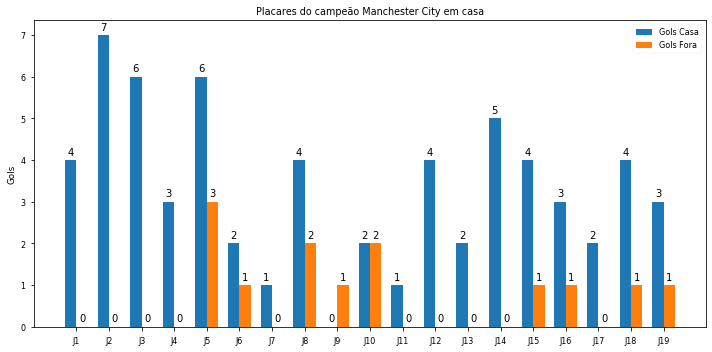

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '8456' and season = '2013/2014'", \
                  "away_team_goal", "match", "home_team_api_id = '8456' and season = '2013/2014'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester City em casa")

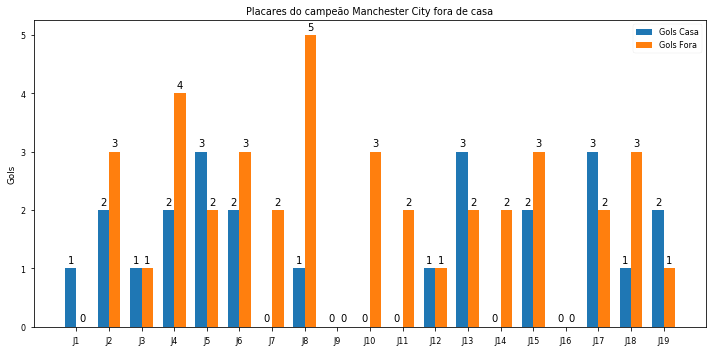

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '8456' and season = '2013/2014'", \
                  "away_team_goal", "match", "away_team_api_id = '8456' and season = '2013/2014'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Manchester City fora de casa")

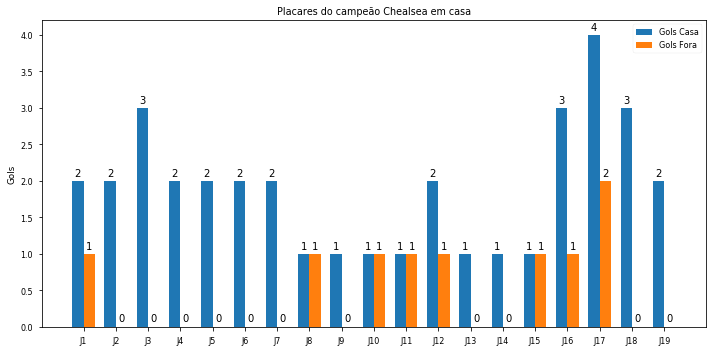

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '8455' and season = '2014/2015'", \
                  "away_team_goal", "match", "home_team_api_id = '8455' and season = '2014/2015'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Chealsea em casa")

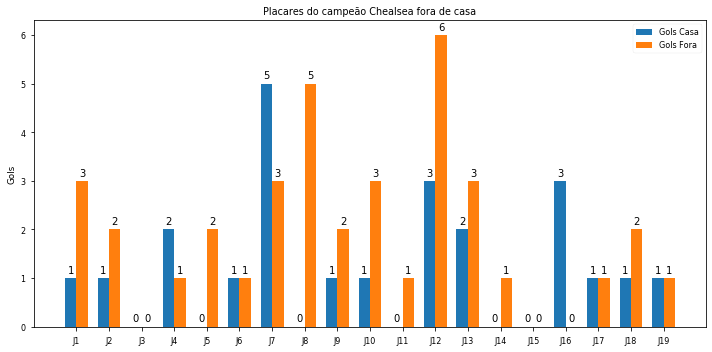

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '8455' and season = '2014/2015'", \
                  "away_team_goal", "match", "away_team_api_id = '8455' and season = '2014/2015'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Chealsea fora de casa")

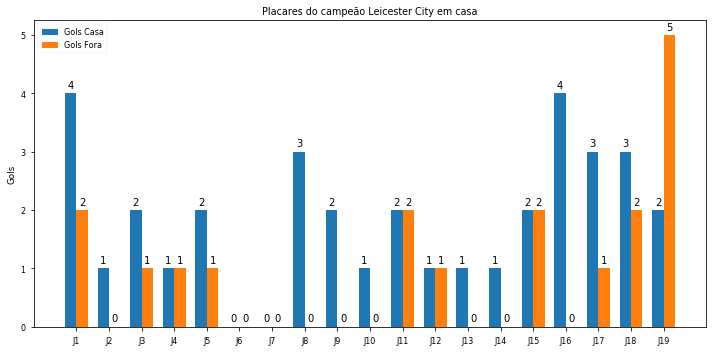

In [0]:
gerar_grouped_bar("home_team_goal", "match", "home_team_api_id = '8197' and season = '2015/2016'", \
                  "away_team_goal", "match", "home_team_api_id = '8197' and season = '2015/2016'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Leicester City em casa")

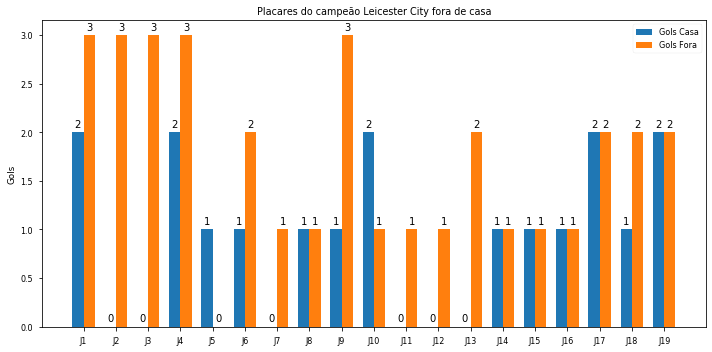

In [0]:
gerar_grouped_bar("home_team_goal", "match", "away_team_api_id = '8197' and season = '2015/2016'", \
                  "away_team_goal", "match", "away_team_api_id = '8197' and season = '2015/2016'", \
                  "Gols Casa", "Gols Fora", "Gols", "Placares do campeão Leicester City fora de casa")